In [11]:
from sympy import *
from numpy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import statistics
from fractions import Fraction
m =40.0*1.66e-27 #calcium
kb = 1.380e-23 #ボルツマン定数
Tk = 500e-6 # 
T = 500   #初期温度
d=8 #deg#rotating angle
rad=(d/180)*2*pi #radian
#vy0=(kb*T/m)**0.5 #初期速度
#vy = (kb*Tk/m)**0.5 #イオンが振動している速さ
wy = 2*pi*1000e3 #y方向の永年周波数
#レーザー冷却項に必要な定数
hbar = 1.054e-34 #J.s
h = 2*pi*hbar
c = 3.0e8
Gamma=2*pi*20.6e6   #Hz
tau=1/Gamma #寿命

lamda = 397e-9 #nm,冷却レーザーの波長
delta=2*pi*10e6   #detuning#Hz#delta-omega
k=2*pi/lamda
dg = -0.5 #δ/Γ
I = 120e-6/(pi*(60e-6)**2) 
Isat = (pi/3)*(h*c)/(tau*lamda**3) #W/m^2
s=Ir=10
#a = (4*hbar*k**2)*Ir*(-2*dg)/((1+(2*dg)**2)**2)/m
y0=-50e-6
vy0=100
print(Isat)
print(I)
print(I/Isat)
k

430.3738947213208
10610.32953945969
24.653747984250245


15826663.24226596

In [12]:
d=8 #deg#rotating angle
rad=(d/180)*2*pi #radian
Delta=delta+k*vy0*cos(pi/2-rad)
F_harm=-m*y0*wy**2
F_diss=hbar*Gamma*k*(s/2)/(1+s+(2*Delta/Gamma)**2)
F_y=F_diss*sin(rad)
sin(rad)

0.27563735581699916

In [13]:
# 変数の定義


dt = 1e-8

# 時間データ
t = arange(0, 5e-2, dt)


In [14]:
# 運動方程式の関数化

def func_0(vy, y):
    vy_abs=abs(vy)
    K=-hbar*k*Gamma*s/2
    '''運動方程式'''
    return - wy**2 * y+ K / m /(1+s+((delta-k*vy)/(2*Gamma))**2)
"""
def func(vy, y):
    vy_abs=abs(vy)
    K=-hbar*k*Gamma*s*sin(rad)/2
    '''運動方程式'''
    return - wy**2 * y+ K / m /(1+s+((delta-k*vy*sin(rad))/(2*Gamma))**2)
"""

"\ndef func(vy, y):\n    vy_abs=abs(vy)\n    K=-hbar*k*Gamma*s*sin(rad)/2\n    '''運動方程式'''\n    return - wy**2 * y+ K / m /(1+s+((delta-k*vy*sin(rad))/(2*Gamma))**2)\n"

In [15]:
# ルンゲクッタ法による数値解析
def runge_kutta_method(t, dt, y0, vy0, func):
    '''ルンゲクッタ法'''
    y = zeros((len(t)))
    vy = zeros((len(t)))
    for i in range(len(t) - 1):
        if i == 0:
            y[i] = y0
            vy[i] = vy0
            
        k1_y = vy[i] * dt
        k1_vy = func(vy[i], y[i]) * dt
        
        k2_y = (vy[i] + k1_vy / 2) * dt
        k2_vy = func(vy[i] + k1_vy / 2, y[i] + k1_y / 2) * dt
        
        k3_y = (vy[i] + k2_vy / 2) * dt
        k3_vy = func(vy[i] + k2_vy / 2, y[i] + k2_y / 2) * dt
        
        k4_y = (vy[i] + k3_vy) * dt
        k4_vy = func(vy[i] + k3_vy, y[i] + k3_y) * dt
        
        y[i + 1] = y[i] + (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6
        vy[i + 1] = vy[i] + (k1_vy + 2 * k2_vy + 2 * k3_vy + k4_vy) / 6
    return y,vy
# プロット




In [16]:
vy0=100
y_rk_0 = runge_kutta_method(t, dt, y0, vy0, func_0)

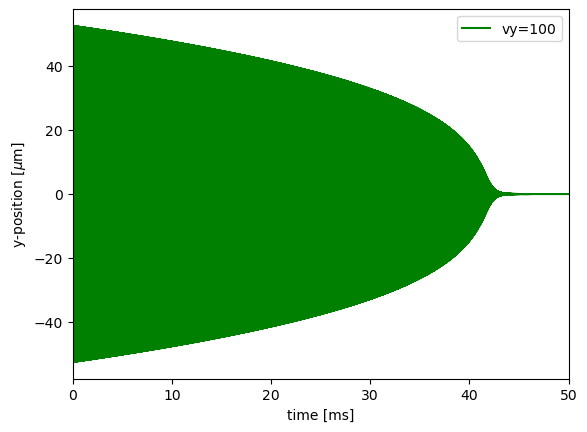

In [17]:


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**3, y_rk_0[0]*10**6, 'g', label='vy=100')
ax.set_xlabel('time [ms]')
ax.set_ylabel('y-position [$\u03bc$m]')
ax.set_xlim(0, 50)
plt.legend(loc='best')

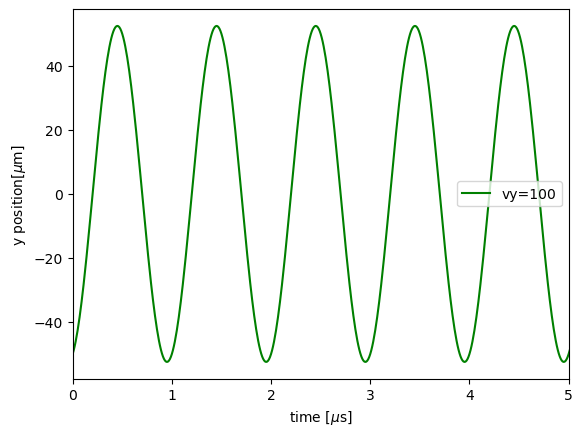

In [53]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**6, y_rk_0[0]*10**6, 'g', label='vy=100')
ax.set_xlabel('time [$\u03bc$s]')
ax.set_xlim(0, 5)
ax.set_ylabel('y position[$\u03bc$m]')
plt.legend(loc='best')

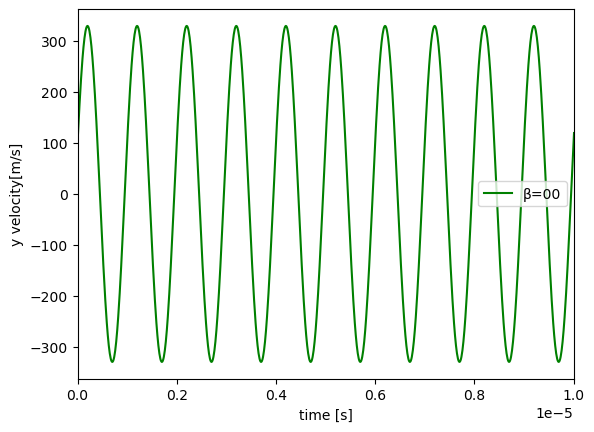

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t, y_rk_0[1], 'g', label='β=00')
ax.set_xlabel('time [s]')
ax.set_xlim(0, 1e-5)
ax.set_ylabel('y velocity[m/s]')
plt.legend(loc='best')

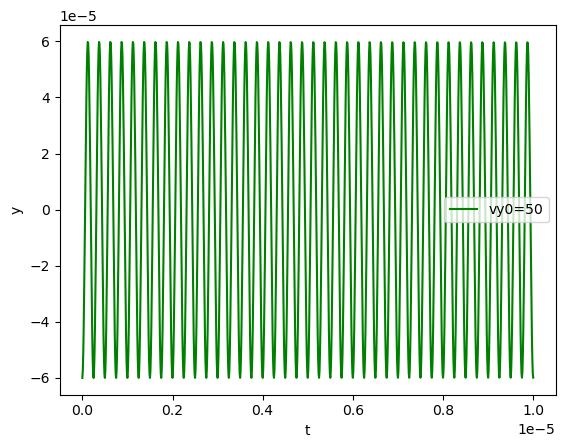

In [132]:
# プロット
vy0=500
y_rk = runge_kutta_method(t, dt, y0, vy0, func)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t, y_rk[0], 'g', label='vy0=50')
ax.set_xlabel('t')
ax.set_ylabel('y')
plt.legend(loc='best')

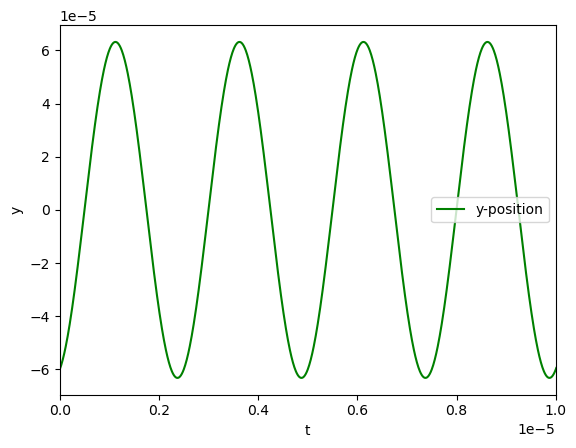

In [107]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t, y_rk[0], 'g', label='vy0=50')
ax.set_xlabel('time[s]')
ax.set_xlim(0, 1e-5)
ax.set_ylabel('y-position[m]')
plt.legend(loc='best')

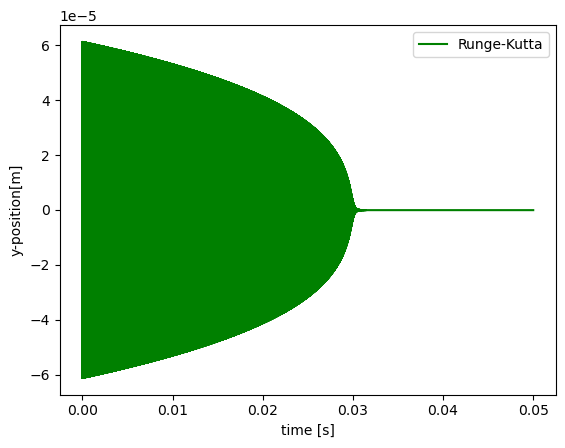

In [109]:
# プロット
vy0=30
y_rk = runge_kutta_method(t, dt, y0, vy0, func)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t, y_rk[0], 'g', label='vy0=30')
ax.set_xlabel('time [s]')
ax.set_ylabel('y-position[m]')
plt.legend(loc='best')

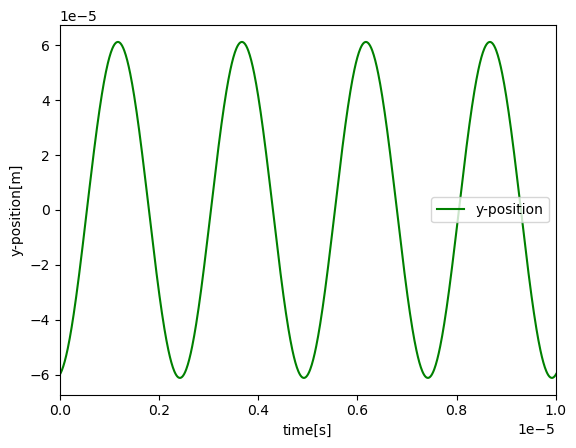

In [110]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t, y_rk[0], 'g', label='y-position')
ax.set_xlabel('time[s]')
ax.set_xlim(0, 1e-5)
ax.set_ylabel('y-position[m]')
plt.legend(loc='best')

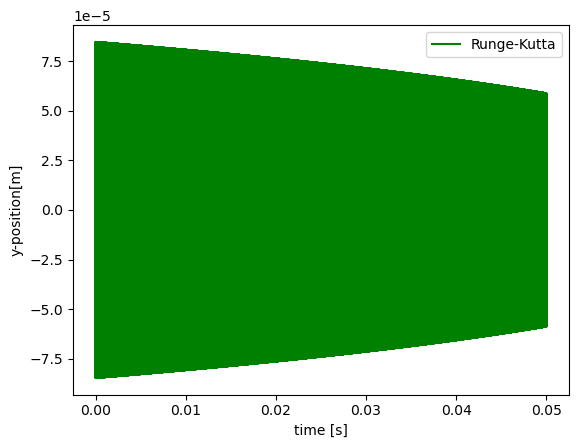

In [111]:
vy0=150
y_rk = runge_kutta_method(t, dt, y0, vy0, func)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t, y_rk[0], 'g', label='vy0=150')
ax.set_xlabel('time [s]')
ax.set_ylabel('y-position[m]')
plt.legend(loc='best')

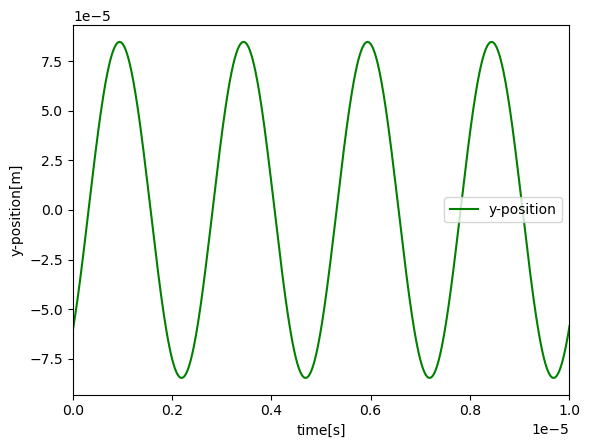

In [112]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t, y_rk[0], 'g', label='vy0=150')
ax.set_xlabel('time[s]')
ax.set_xlim(0, 1e-5)
ax.set_ylabel('y-position[m]')
plt.legend(loc='best')

In [53]:
dt = 1e-8

# 時間データ
t = arange(0, 0.15, dt)

In [54]:
def func_90(vy, y):
    rad=0
    vy_abs=abs(vy)
    K=-hbar*k*Gamma*s*sin(rad)/2
    return - wy**2* y+ K / m /(1+s+((delta-k*vy*sin(rad))/(2*Gamma))**2)

y_rk_90 = runge_kutta_method(t, dt, y0, vy0, func_90)
y_rk

(array([-6.00000000e-05, -5.88822617e-05, -5.75321420e-05, ...,
        -6.19146089e-05, -6.16755897e-05, -6.11931652e-05]),
 array([100.        , 123.47413796, 146.46098001, ...,  11.6921841 ,
         36.09593733,  60.35723641]))

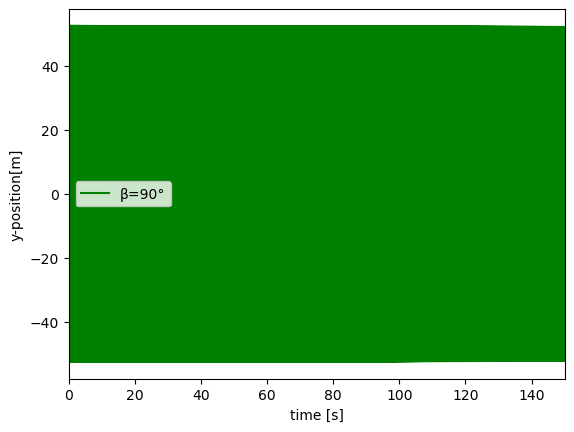

In [55]:
vy0=100

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**3, y_rk_90[0]*10**6, 'g', label='β=90°')
ax.set_xlabel('time [s]')
ax.set_ylabel('y-position[m]')
ax.set_xlim(0,150)
plt.legend(loc='best')

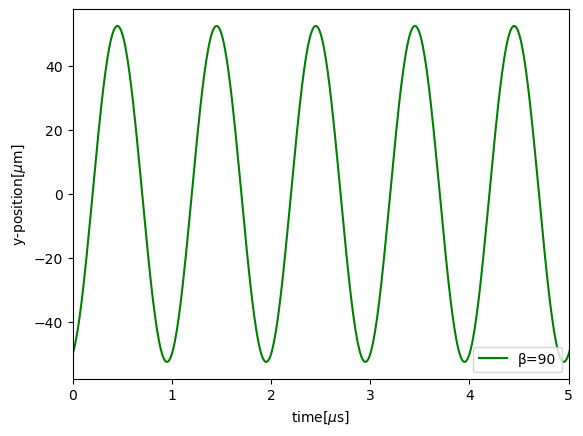

In [56]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**6, y_rk_90[0]*10**6, 'g', label='β=90')
ax.set_xlabel('time[$\u03bc$s]')
ax.set_xlim(0, 5)
ax.set_ylabel('y-position[$\u03bc$m]')
plt.legend(loc='best')

In [59]:
def func_82(vy, y):
    rad=(d/180)*pi
    vy_abs=abs(vy)
    K=-hbar*k*Gamma*s*sin(rad)/2
    '''運動方程式'''
    return - wy**2 * y+ K / m /(1+s+((delta-k*vy*sin(rad))/(2*Gamma))**2)
vy0=100
y_rk_82 = runge_kutta_method(t, dt, y0, vy0, func_82)

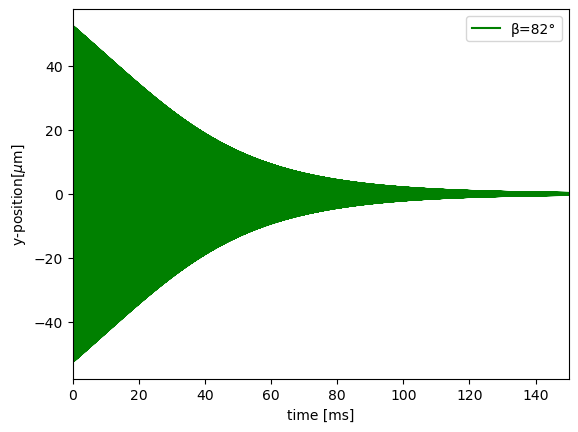

In [60]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**3, y_rk_82[0]*10**6, 'g', label='β=82°')
ax.set_xlabel('time [ms]')
ax.set_xlim(0,150)
ax.set_ylabel('y-position[$\u03bc$m]')
plt.legend(loc='best')

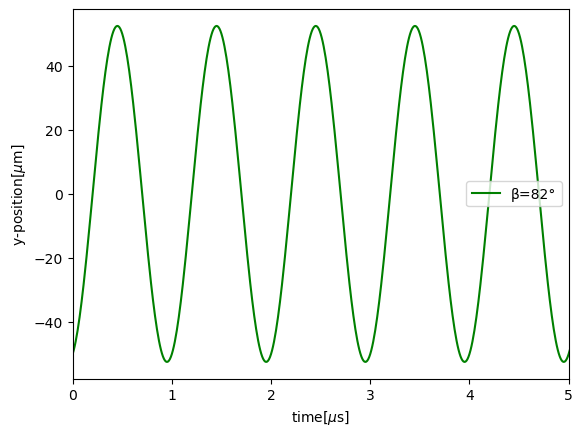

In [61]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**6, y_rk_82[0]*10**6, 'g', label='β=82°')
ax.set_xlabel('time[$\u03bc$s]')
ax.set_xlim(0, 5)
ax.set_ylabel('y-position[$\u03bc$m]')
plt.legend(loc='best')

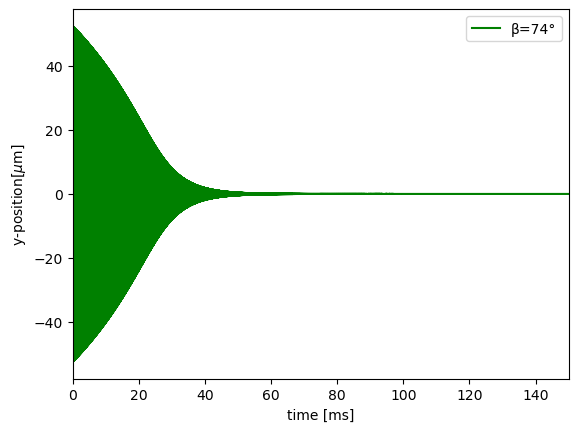

In [62]:
def func_74(vy, y):
    rad=(16/180)*pi
    vy_abs=abs(vy)
    K=-hbar*k*Gamma*s*sin(rad)/2
    '''運動方程式'''
    return - wy**2 * y+ K / m /(1+s+((delta-k*vy*sin(rad))/(2*Gamma))**2)
vy0=100
y_rk_74 = runge_kutta_method(t, dt, y0, vy0, func_74)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**3, y_rk_74[0]*10**6, 'g', label='β=74°')
ax.set_xlabel('time [ms]')
ax.set_xlim(0,150)
ax.set_ylabel('y-position[$\u03bc$m]')
plt.legend(loc='best')

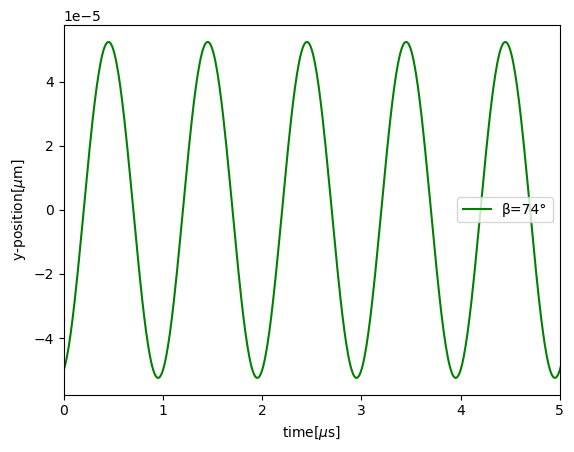

In [63]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**6, y_rk_74[0*10**6], 'g', label='β=74°')
ax.set_xlabel('time[$\u03bc$s]')
ax.set_xlim(0, 5)
ax.set_ylabel('y-position[$\u03bc$m]')
plt.legend(loc='best')

In [10]:
dt = 1e-8

# 時間データ
t = arange(0, 0.15, dt)

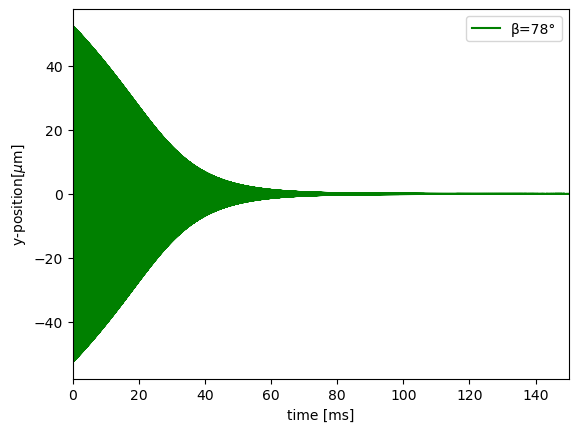

In [11]:
def func_78(vy, y):
    rad=(12/180)*pi
    vy_abs=abs(vy)
    K=-hbar*k*Gamma*s*sin(rad)/2
    '''運動方程式'''
    return - wy**2 * y+ K / m /(1+s+((delta-k*vy*sin(rad))/(2*Gamma))**2)
vy0=100
y_rk_78 = runge_kutta_method(t, dt, y0, vy0, func_78)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**3, y_rk_78[0]*10**6, 'g', label='β=78°')
ax.set_xlabel('time [ms]')
ax.set_xlim(0,150)
ax.set_ylabel('y-position[$\u03bc$m]')
plt.legend(loc='best')

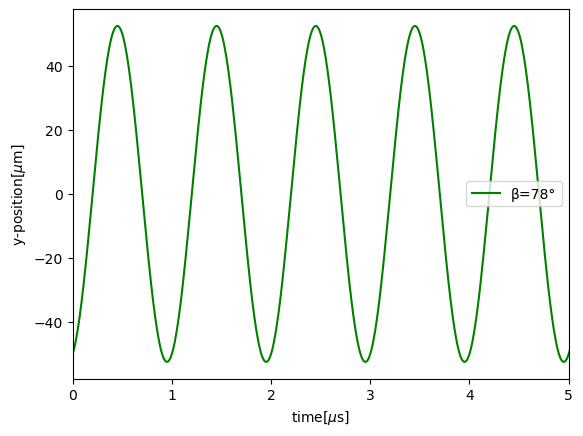

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**6, y_rk_78[0]*10**6, 'g', label='β=78°')
ax.set_xlabel('time[$\u03bc$s]')
ax.set_xlim(0, 5)
ax.set_ylabel('y-position[$\u03bc$m]')
plt.legend(loc='best')

In [60]:
dt = 1e-8
t = arange(0, 0.5, dt)
def func_86(vy, y):
    rad=(4/180)*pi
    vy_abs=abs(vy)
    K=-hbar*k*Gamma*s*sin(rad)/2
    '''運動方程式'''
    return - wy**2 * y+ K / m /(1+s+((delta-k*vy*sin(rad))/(2*Gamma))**2)
vy0=100
y_rk_86 = runge_kutta_method(t, dt, y0, vy0, func_86)


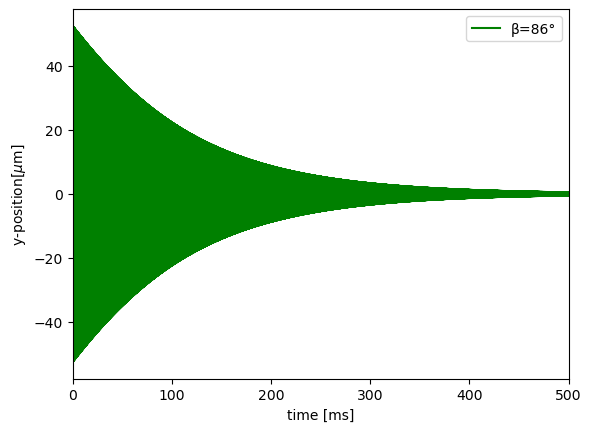

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**3, y_rk_86[0]*10**6, 'g', label='β=86°')
ax.set_xlim(0, 500)
ax.set_xlabel('time [ms]')
ax.set_ylabel('y-position[$\u03bc$m]')
plt.legend(loc='best')

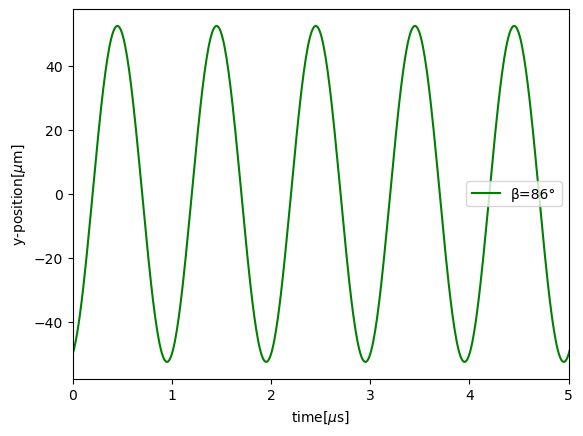

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**6, y_rk_86[0]*10**6, 'g', label='β=86°')
ax.set_xlabel('time[$\u03bc$s]')
ax.set_xlim(0, 5)
ax.set_ylabel('y-position[$\u03bc$m]')
plt.legend(loc='best')

In [7]:
dt = 1e-8
t = arange(0, 0.3, dt)

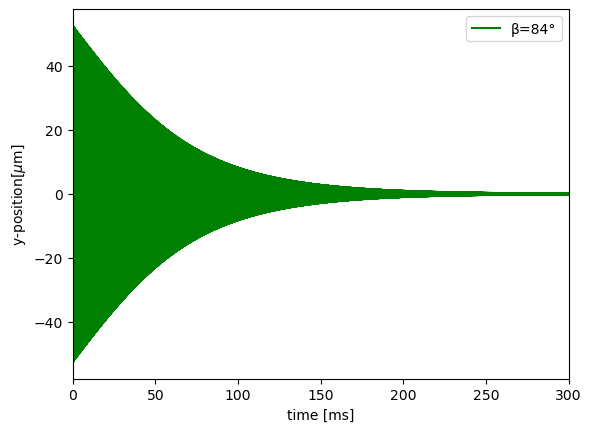

In [8]:
def func_84(vy, y):
    rad=(6/180)*pi
    vy_abs=abs(vy)
    K=-hbar*k*Gamma*s*sin(rad)/2
    '''運動方程式'''
    return - wy**2 * y+ K / m /(1+s+((delta-k*vy*sin(rad))/(2*Gamma))**2)
rad=(6/180)*pi
vy0=100*cos(rad)
y_rk_84 = runge_kutta_method(t, dt, y0, vy0, func_84)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**3, y_rk_84[0]*10**6, 'g', label='β=84°')
ax.set_xlabel('time [ms]')
ax.set_xlim(0, 300)
ax.set_ylabel('y-position[$\u03bc$m]')
plt.legend(loc='best')

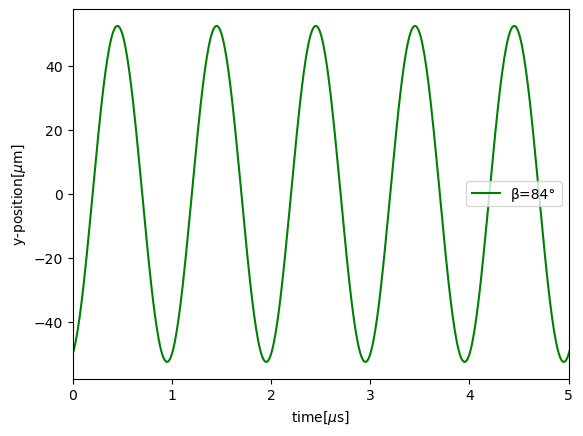

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**6, y_rk_84[0]*10**6, 'g', label='β=84°')
ax.set_xlabel('time[$\u03bc$s]')
ax.set_xlim(0, 5)
ax.set_ylabel('y-position[$\u03bc$m]')
plt.legend(loc='best')

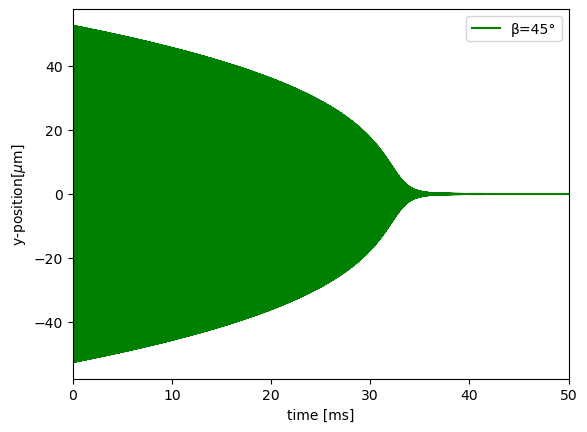

In [55]:
dt = 1e-8
t = arange(0, 0.05, dt)
def func_45(vy, y):
    rad=(45/180)*pi
    vy_abs=abs(vy)
    K=-hbar*k*Gamma*s*sin(rad)/2
    '''運動方程式'''
    return - wy**2 * y+ K / m /(1+s+((delta-k*vy*sin(rad))/(2*Gamma))**2)
vy0=100
y_rk_45 = runge_kutta_method(t, dt, y0, vy0, func_45)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**3, y_rk_45[0]*10**6, 'g', label='β=45°')
ax.set_xlabel('time [ms]')
ax.set_xlim(0, 50)
ax.set_ylabel('y-position[$\u03bc$m]')
plt.legend(loc='best')

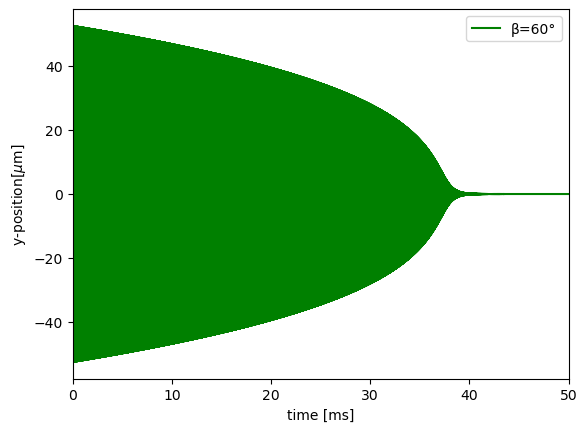

In [56]:
dt = 1e-8
t = arange(0, 0.05, dt)
def func_60(vy, y):
    rad=(60/180)*pi
    vy_abs=abs(vy)
    K=-hbar*k*Gamma*s*sin(rad)/2
    '''運動方程式'''
    return - wy**2 * y+ K / m /(1+s+((delta-k*vy*sin(rad))/(2*Gamma))**2)
vy0=100
y_rk_60 = runge_kutta_method(t, dt, y0, vy0, func_60)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**3, y_rk_60[0]*10**6, 'g', label='β=60°')
ax.set_xlabel('time [ms]')
ax.set_xlim(0, 50)
ax.set_ylabel('y-position[$\u03bc$m]')
plt.legend(loc='best')

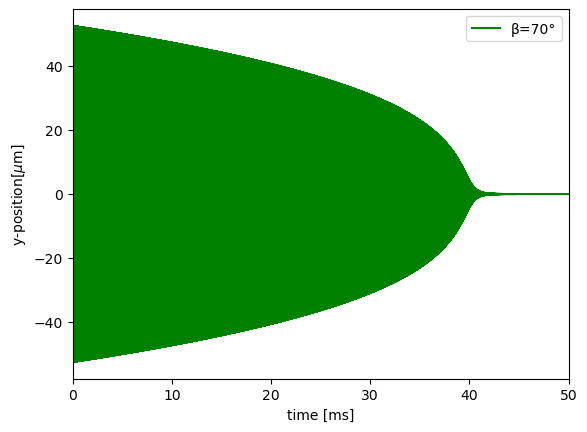

In [57]:
dt = 1e-8
t = arange(0, 0.05, dt)
def func_70(vy, y):
    rad=(70/180)*pi
    vy_abs=abs(vy)
    K=-hbar*k*Gamma*s*sin(rad)/2
    '''運動方程式'''
    return - wy**2 * y+ K / m /(1+s+((delta-k*vy*sin(rad))/(2*Gamma))**2)
vy0=100
y_rk_70 = runge_kutta_method(t, dt, y0, vy0, func_70)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t, y_true, label='True')
ax.plot(t*10**3, y_rk_70[0]*10**6, 'g', label='β=70°')
ax.set_xlabel('time [ms]')
ax.set_xlim(0, 50)
ax.set_ylabel('y-position[$\u03bc$m]')
plt.legend(loc='best')

In [ ]:
e=1.6021e-19 #C
wy = 2*pi*4000e3
U=m*(wy*60e-6)**2/2
U/e

In [79]:
0.2*e

3.2042000000000004e-20

In [80]:
v=sqrt(2*0.02*e/m)
v

310.66388298733904

In [81]:
sqrt((2*U)/m)

150.79644737231007